In [131]:
import numpy as np
import matplotlib.pyplot as plt


In [72]:
data = np.load('fashion_train.npy')

array([0, 1, 0, ..., 3, 0, 1], dtype=uint8)

In [75]:
Y=data[:,-1]
X=np.delete(data,-1,axis=1)
label_dict = {0:'t_shirts', 1:'trouseres', 2:'pullover', 3: 'dress', 4:'shirt'}

mean_vectors = []

for cl in range(5):
    mean_vectors.append(np.mean(X[Y==cl],axis=0))
    print("Mean Vectors class %s: %s\n" % (cl+1,mean_vectors[cl]))

Mean Vectors class 1: [3.93507132e-03 2.01672405e-02 1.57402853e-01 3.48745696e-01
 3.29070339e-01 5.31726513e-01 1.40137727e+00 5.24200689e+00
 1.50196754e+01 3.36109198e+01 5.82621741e+01 7.51239547e+01
 6.38903099e+01 5.00880472e+01 4.87092966e+01 5.69212986e+01
 7.72666011e+01 7.40059026e+01 4.77329070e+01 2.32242991e+01
 9.06640433e+00 2.70044270e+00 8.47024102e-01 4.96802755e-01
 2.82341367e-01 1.55927201e-01 2.26266601e-02 5.41072307e-03
 1.42646335e-02 3.00049188e-02 3.10378751e-01 7.83571077e-01
 1.18544024e+00 6.51451058e+00 2.61805214e+01 6.08607969e+01
 9.61146090e+01 1.23641417e+02 1.41842597e+02 1.62824397e+02
 1.71251353e+02 1.63973930e+02 1.61060010e+02 1.71953271e+02
 1.74334973e+02 1.53256763e+02 1.35627152e+02 1.13770290e+02
 8.09552386e+01 4.30973930e+01 1.42675848e+01 3.42793901e+00
 1.17461879e+00 6.23708805e-01 2.45941958e-01 1.00344319e-01
 2.31185440e-02 5.95179538e-02 3.55632071e-01 1.39055583e+00
 7.38268569e+00 4.15981308e+01 9.08681751e+01 1.16861781e+02
 1

In [92]:
S_W = np.zeros((784,784))
for cl,mv in zip(range(5),mean_vectors):
    class_sc_mat = np.zeros((784,784))
    for row in X[Y==cl]:
        row,mv = row.reshape(784,1),mv.reshape(784,1)
        class_sc_mat+= (row-mv).dot((row-mv).T)
    S_W += class_sc_mat

In [108]:
overall_mean = np.mean(X,axis= 0)
S_B = np.zeros((784,784))
for i,mean_vec in enumerate(mean_vectors):
    n= X[Y==i,:].shape[0]
    mean_vec=mean_vec.reshape(784,1)
    overall_mean = overall_mean.reshape(784,1)
    S_B+=n*(mean_vec-overall_mean).dot((mean_vec-overall_mean).T)

S_B.shape

(784, 784)

In [111]:
S_B, S_W

(array([[ 9.35474659e-02,  7.45005495e-02, -6.17516406e-02, ...,
         -4.32768698e+01, -6.57023762e+00, -2.77750827e-02],
        [ 7.45005495e-02,  4.18376969e-01,  3.31837137e+00, ...,
         -1.88323092e+01, -3.06111770e+00,  3.85355734e-02],
        [-6.17516406e-02,  3.31837137e+00,  3.34420087e+01, ...,
          2.95406884e+00, -4.01702245e+00, -4.52227602e-01],
        ...,
        [-4.32768698e+01, -1.88323092e+01,  2.95406884e+00, ...,
          7.43365458e+04,  1.16678223e+04,  4.72836318e+02],
        [-6.57023762e+00, -3.06111770e+00, -4.01702245e+00, ...,
          1.16678223e+04,  1.83374293e+03,  7.46379269e+01],
        [-2.77750827e-02,  3.85355734e-02, -4.52227602e-01, ...,
          4.72836318e+02,  7.46379269e+01,  4.06410929e+00]]),
 array([[3.07838853e+02, 3.05694099e+02, 3.04379552e+02, ...,
         1.88896670e+02, 1.95804038e+02, 2.10328375e+02],
        [3.05694099e+02, 5.59789523e+02, 5.44923329e+02, ...,
         1.46337701e+03, 9.37476818e+02, 4.8456

In [115]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(784,1)

In [118]:
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse= True)

print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print(i[0])

Eigenvalues in decreasing order: 

8.400400497528505
2.782194358841238
1.8046306427134786
0.7584194591400125
1.2136180008155694e-13
1.1182065785088237e-13
1.0203189459144795e-13
1.0203189459144795e-13
9.287252706940697e-14
9.287252706940697e-14
8.278709188057213e-14
8.254264795300324e-14
8.254264795300324e-14
7.50332525018971e-14
7.50332525018971e-14
7.436709981442762e-14
7.066971483012653e-14
6.909502683193016e-14
6.909502683193016e-14
6.312776749387908e-14
6.312776749387908e-14
6.205276772869092e-14
6.205276772869092e-14
6.112808132281761e-14
6.080243015131778e-14
5.942117582809527e-14
5.942117582809527e-14
5.863325122684349e-14
5.863325122684349e-14
5.645099849285832e-14
5.645099849285832e-14
5.523979164734759e-14
5.523979164734759e-14
5.4824679981165476e-14
5.4824679981165476e-14
5.4360203817590944e-14
5.4360203817590944e-14
5.409323187601852e-14
5.409323187601852e-14
5.2774374248243464e-14
5.2774374248243464e-14
5.2691021870373574e-14
5.2691021870373574e-14
5.087671219230704e-14
5

In [120]:
eigenvalues_sum = sum(eigenvalues)
for i, j in enumerate(eigen_pairs):
    print ("Eigenvalue {0:}: {1:.2%}". format(i+1,(j[0]/eigenvalues_sum).real))

Eigenvalue 1: 61.11%
Eigenvalue 2: 20.24%
Eigenvalue 3: 13.13%
Eigenvalue 4: 5.52%
Eigenvalue 5: 0.00%
Eigenvalue 6: 0.00%
Eigenvalue 7: 0.00%
Eigenvalue 8: 0.00%
Eigenvalue 9: 0.00%
Eigenvalue 10: 0.00%
Eigenvalue 11: 0.00%
Eigenvalue 12: 0.00%
Eigenvalue 13: 0.00%
Eigenvalue 14: 0.00%
Eigenvalue 15: 0.00%
Eigenvalue 16: 0.00%
Eigenvalue 17: 0.00%
Eigenvalue 18: 0.00%
Eigenvalue 19: 0.00%
Eigenvalue 20: 0.00%
Eigenvalue 21: 0.00%
Eigenvalue 22: 0.00%
Eigenvalue 23: 0.00%
Eigenvalue 24: 0.00%
Eigenvalue 25: 0.00%
Eigenvalue 26: 0.00%
Eigenvalue 27: 0.00%
Eigenvalue 28: 0.00%
Eigenvalue 29: 0.00%
Eigenvalue 30: 0.00%
Eigenvalue 31: 0.00%
Eigenvalue 32: 0.00%
Eigenvalue 33: 0.00%
Eigenvalue 34: 0.00%
Eigenvalue 35: 0.00%
Eigenvalue 36: 0.00%
Eigenvalue 37: 0.00%
Eigenvalue 38: 0.00%
Eigenvalue 39: 0.00%
Eigenvalue 40: 0.00%
Eigenvalue 41: 0.00%
Eigenvalue 42: 0.00%
Eigenvalue 43: 0.00%
Eigenvalue 44: 0.00%
Eigenvalue 45: 0.00%
Eigenvalue 46: 0.00%
Eigenvalue 47: 0.00%
Eigenvalue 48: 0.00

In [136]:
W = np.hstack((eigen_pairs[0][1].reshape(784,1),eigen_pairs[1][1].reshape(784,1),eigen_pairs[2][1].reshape(784,1),eigen_pairs[3][1].reshape(784,1)))
W

array([[-5.16336674e-01+0.j, -4.31651762e-01+0.j,  4.58020706e-01+0.j,
        -3.23779475e-01+0.j],
       [-1.41341884e-01+0.j, -2.07331237e-01+0.j,  1.72109500e-01+0.j,
         1.35781734e-01+0.j],
       [-9.08829143e-02+0.j, -5.20306347e-02+0.j, -5.72762310e-02+0.j,
         1.39610800e-01+0.j],
       ...,
       [ 2.19006540e-03+0.j, -2.62972025e-03+0.j,  1.39130177e-05+0.j,
        -2.35437842e-03+0.j],
       [-7.43358628e-04+0.j, -1.69854366e-02+0.j,  1.82708177e-02+0.j,
         5.14396512e-02+0.j],
       [-1.59850278e-02+0.j,  5.86833102e-02+0.j,  2.39439037e-02+0.j,
         1.23099004e-01+0.j]])

In [127]:
X_lda = X.dot(W)


In [134]:
X_lda

array([[-3.07188115+0.j,  0.32390806+0.j, -2.3229647 +0.j,
         4.66593953+0.j],
       [10.14335255+0.j, -2.11529738+0.j, -0.34439288+0.j,
        -0.22703794+0.j],
       [-2.01779564+0.j,  0.22122295+0.j, -5.17755207+0.j,
         7.94497737+0.j],
       ...,
       [ 0.91947694+0.j,  4.78790747+0.j,  2.32795235+0.j,
         1.25358388+0.j],
       [-1.13875185+0.j,  0.83198739+0.j, -2.27899417+0.j,
         4.77393302+0.j],
       [11.97170698+0.j, -1.62074241+0.j, -1.93231898+0.j,
         1.59112492+0.j]])

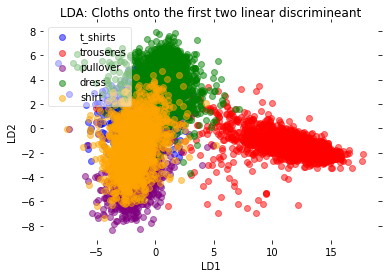

In [135]:
def plot_step_lda():
    ax=plt.subplot(111)
    for label, color in zip(range(0,5),("blue","red","purple","green","orange")):
        plt.scatter(x=X_lda[:,0].real[Y==label],
        y = X_lda[:,1].real[Y==label], color = color , alpha=0.5, label = label_dict[label])

    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend(loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA: Cloths onto the first two linear discrimineant")

    plt.tick_params(axis= 'both', which = 'both', bottom = 'off', top = 'off', labelbottom = 'on', left = 'off', right ='off', labelleft= 'on')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

plot_step_lda()